In [52]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing the Dog vs Cat Dataset from Kaggle**

In [54]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
#list all the files in the directory
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [56]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [57]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [58]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


**Printing the name of images**

In [59]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.11146.jpg', 'cat.5271.jpg', 'cat.788.jpg', 'cat.7838.jpg', 'dog.5473.jpg', 'cat.3629.jpg', 'dog.8451.jpg', 'cat.878.jpg', 'dog.12359.jpg', 'cat.9621.jpg', 'cat.7935.jpg', 'dog.10174.jpg', 'dog.4360.jpg', 'dog.2609.jpg', 'cat.9065.jpg', 'dog.1448.jpg', 'dog.1472.jpg', 'cat.9112.jpg', 'cat.9406.jpg', 'cat.350.jpg', 'dog.1446.jpg', 'cat.12330.jpg', 'dog.12428.jpg', 'cat.1226.jpg', 'dog.3313.jpg', 'cat.10927.jpg', 'dog.1912.jpg', 'dog.558.jpg', 'dog.2371.jpg', 'dog.5200.jpg', 'dog.1628.jpg', 'dog.1608.jpg', 'dog.11560.jpg', 'dog.3124.jpg', 'dog.3002.jpg', 'cat.11595.jpg', 'dog.8616.jpg', 'dog.1670.jpg', 'cat.1787.jpg', 'dog.8184.jpg', 'dog.6083.jpg', 'dog.1300.jpg', 'dog.5079.jpg', 'dog.3881.jpg', 'cat.7562.jpg', 'cat.1116.jpg', 'dog.3324.jpg', 'cat.9849.jpg', 'dog.2432.jpg', 'cat.11057.jpg', 'dog.12009.jpg', 'dog.1732.jpg', 'dog.10247.jpg', 'dog.8828.jpg', 'dog.8749.jpg', 'cat.12365.jpg', 'dog.2278.jpg', 'dog.2460.jpg', 'dog.10397.jpg', 'cat.5657.jpg', 'cat.885.jpg', 'cat.10726.jpg'

**Importing the Dependencies**

In [60]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

**Displaying the images of dogs and cats**

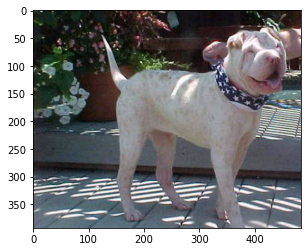

In [61]:
# display dog image
img = mpimg.imread('/content/train/dog.11146.jpg')
imgplt = plt.imshow(img)
plt.show()

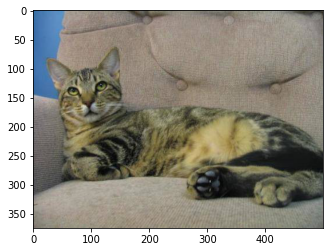

In [73]:
# display cat image
img = mpimg.imread('/content/train/cat.788.jpg')
imgplt = plt.imshow(img)
plt.show()

In [63]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

dog
cat
cat
cat
dog


In [64]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


**Resizing all the images**

In [66]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [67]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

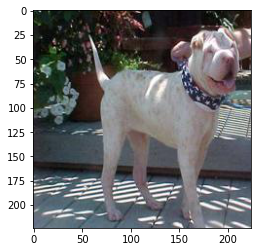

In [68]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.11146.jpg')
imgplt = plt.imshow(img)
plt.show()

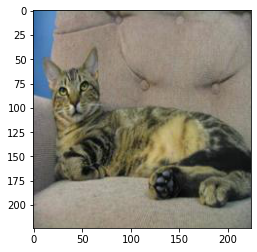

In [72]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.788.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [74]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [75]:
print(filenames[0:5])
print(len(filenames))

['dog.11146.jpg', 'cat.5271.jpg', 'cat.788.jpg', 'cat.7838.jpg', 'dog.5473.jpg']
2000


In [76]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 1]
2000


In [77]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1005  995]


**Converting all the resized images to numpy arrays**

In [78]:
import cv2
import glob

In [79]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [80]:
print(dog_cat_images)

[[[[ 53  69  46]
   [155 171 148]
   [186 197 177]
   ...
   [ 22  29  44]
   [ 18  25  40]
   [ 22  29  44]]

  [[ 27  42  21]
   [ 58  73  52]
   [ 54  66  46]
   ...
   [ 25  32  47]
   [ 22  29  44]
   [ 26  33  48]]

  [[ 26  42  24]
   [ 25  39  21]
   [ 14  26   8]
   ...
   [ 26  33  48]
   [ 23  30  47]
   [ 26  33  50]]

  ...

  [[133 114 101]
   [132 113 100]
   [131 112  99]
   ...
   [129 123 116]
   [118 110 103]
   [105 100  91]]

  [[132 113 100]
   [133 114 101]
   [133 116 103]
   ...
   [180 177 169]
   [152 146 139]
   [127 124 116]]

  [[131 112  99]
   [134 115 102]
   [136 119 106]
   ...
   [234 230 225]
   [215 212 204]
   [199 196 188]]]


 [[[ 79 105  82]
   [ 83 109  85]
   [ 86 115  89]
   ...
   [ 59  90  69]
   [ 66  92  68]
   [ 73  98  72]]

  [[ 78 107  82]
   [ 81 111  86]
   [ 85 116  87]
   ...
   [ 60  90  71]
   [ 64  92  69]
   [ 71  97  73]]

  [[ 76 111  84]
   [ 77 115  85]
   [ 81 120  88]
   ...
   [ 61  90  75]
   [ 64  90  74]
   [ 68  94

In [81]:
type(dog_cat_images)

numpy.ndarray

In [82]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [83]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [86]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [87]:
print(X_train_scaled)

[[[[0.28627451 0.36862745 0.37647059]
   [0.28627451 0.36862745 0.37647059]
   [0.28235294 0.36470588 0.37254902]
   ...
   [0.22745098 0.3372549  0.38039216]
   [0.22745098 0.3372549  0.38039216]
   [0.22745098 0.3372549  0.38039216]]

  [[0.28627451 0.36862745 0.37647059]
   [0.28627451 0.36862745 0.37647059]
   [0.28235294 0.36470588 0.37254902]
   ...
   [0.22745098 0.3372549  0.38039216]
   [0.22745098 0.3372549  0.38039216]
   [0.22745098 0.3372549  0.38039216]]

  [[0.28627451 0.36862745 0.37647059]
   [0.28627451 0.36862745 0.37647059]
   [0.28235294 0.36470588 0.37254902]
   ...
   [0.22745098 0.3372549  0.38039216]
   [0.22745098 0.3372549  0.38039216]
   [0.22745098 0.3372549  0.38039216]]

  ...

  [[0.8627451  0.80784314 0.78431373]
   [0.8627451  0.80784314 0.78431373]
   [0.8745098  0.81176471 0.78431373]
   ...
   [0.74117647 0.70588235 0.66666667]
   [0.70980392 0.6745098  0.63921569]
   [0.71372549 0.67843137 0.63921569]]

  [[0.91372549 0.85882353 0.83529412]
   [0.9

**Building the Neural Network**

In [88]:
import tensorflow as tf
import tensorflow_hub as hub

In [89]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [90]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [91]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [92]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 50s 908ms/step - loss: 0.2018 - acc: 0.9225
Epoch 2/5
50/50 [==============================] - 46s 915ms/step - loss: 0.0647 - acc: 0.9825
Epoch 3/5
50/50 [==============================] - 48s 951ms/step - loss: 0.0499 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 45s 906ms/step - loss: 0.0387 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 45s 908ms/step - loss: 0.0304 - acc: 0.9944


In [93]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 921ms/step - loss: 0.0505 - acc: 0.9825
Test Loss = 0.05053402855992317
Test Accuracy = 0.9825000166893005


**Predictive System**

Path of the image to be predicted: /content/imagem_teste.jpg


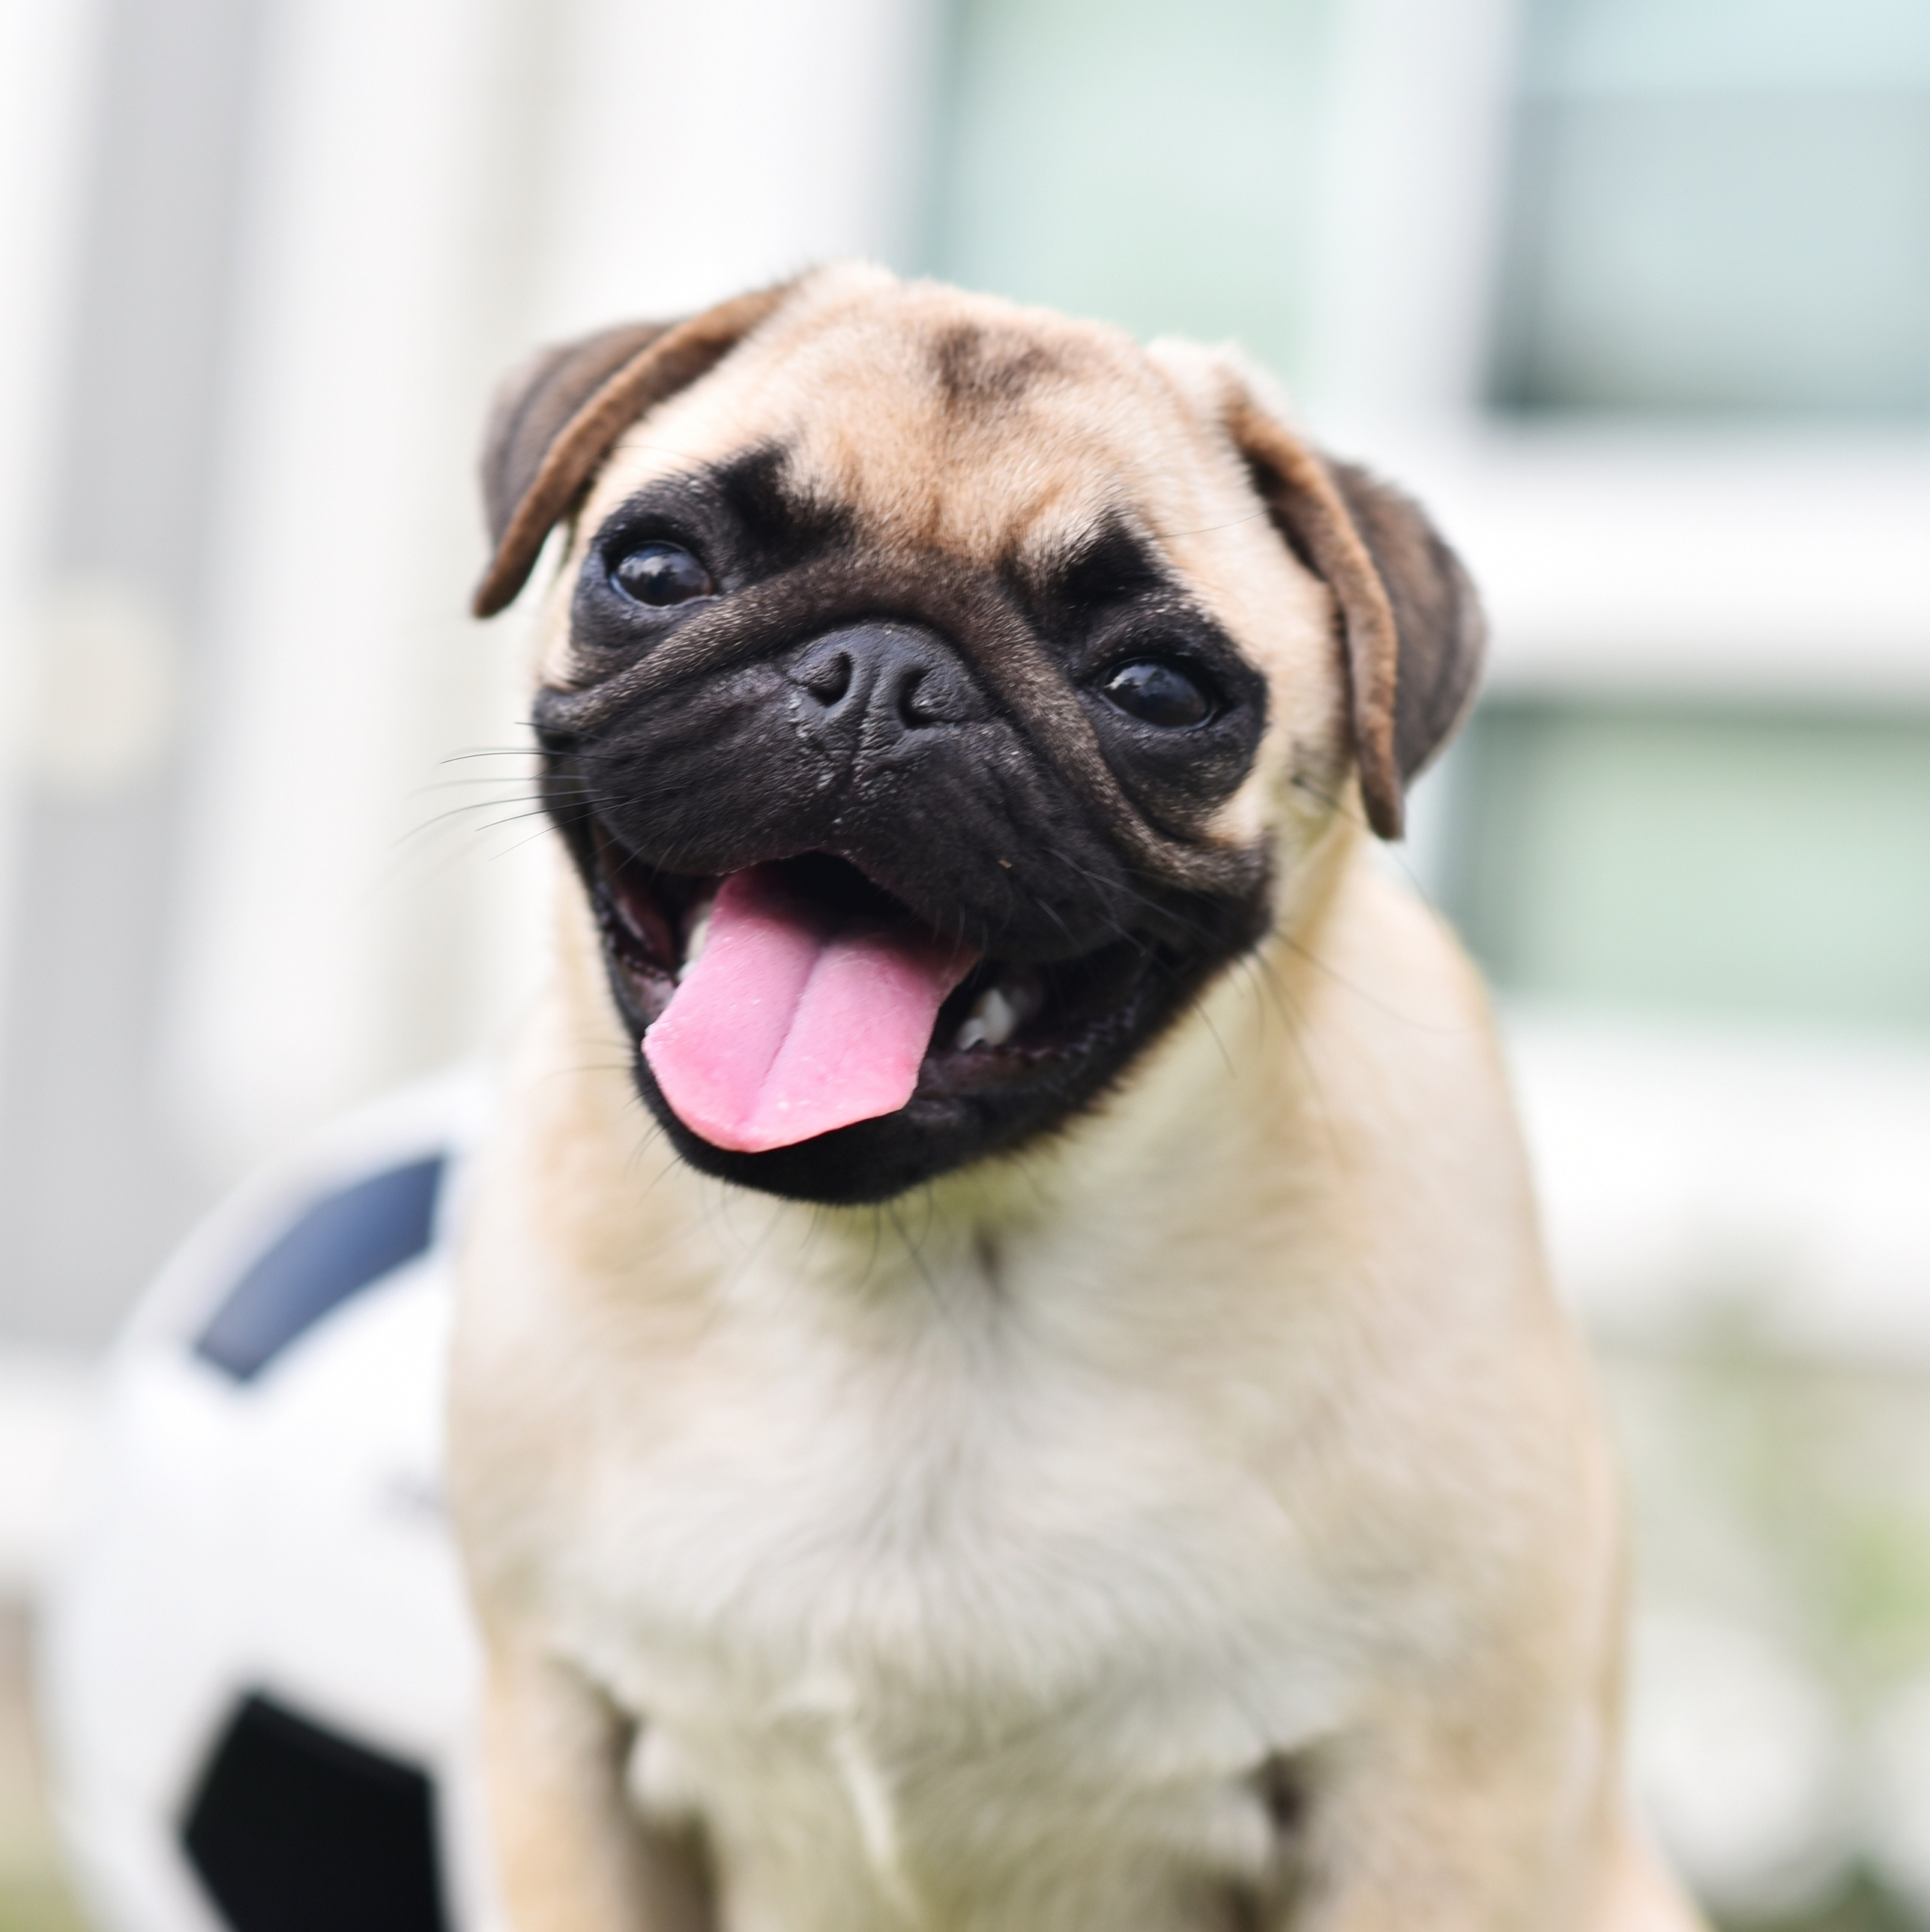

1/1 [==============================] - 1s 990ms/step
[[-3.1357045  1.1946179]]
1
The image represents a Dog


In [95]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/imagem_teste2.jpg


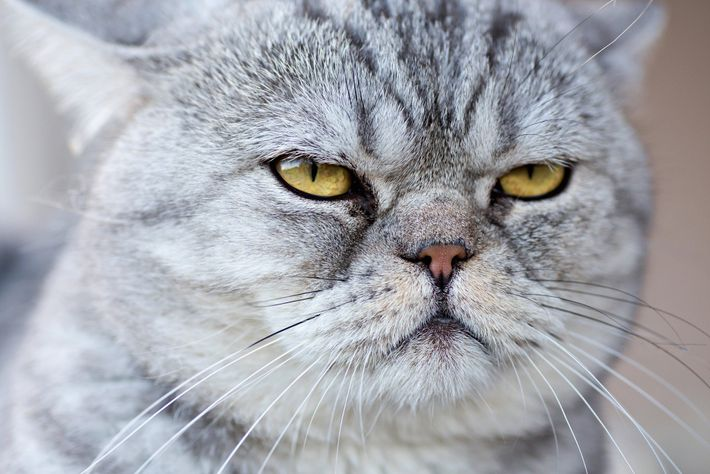

1/1 [==============================] - 0s 131ms/step
[[ 1.7967337 -2.202545 ]]
0
The image represents a Cat


In [96]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')